## Assignment

**NAMA : MARINA IRDAYANTI**

**NIM : 1301174319**

**CII4L3-IF-41-GAB02**

Import necessary library

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(7)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,61,34,51,31,59,61,44,18,23,21,27,19,12,13,25,17,25,14,24,32,15,32,38,27,37,51,25


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

In [ ]:
df_can.columns = list(map(str, df_can.columns))

In [ ]:
years = list(map(str, range(1980, 2014))) 

In [ ]:
df_can.set_index('Country', inplace=True)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
data = df_can.loc[['China', 'India'], years].transpose()
data.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

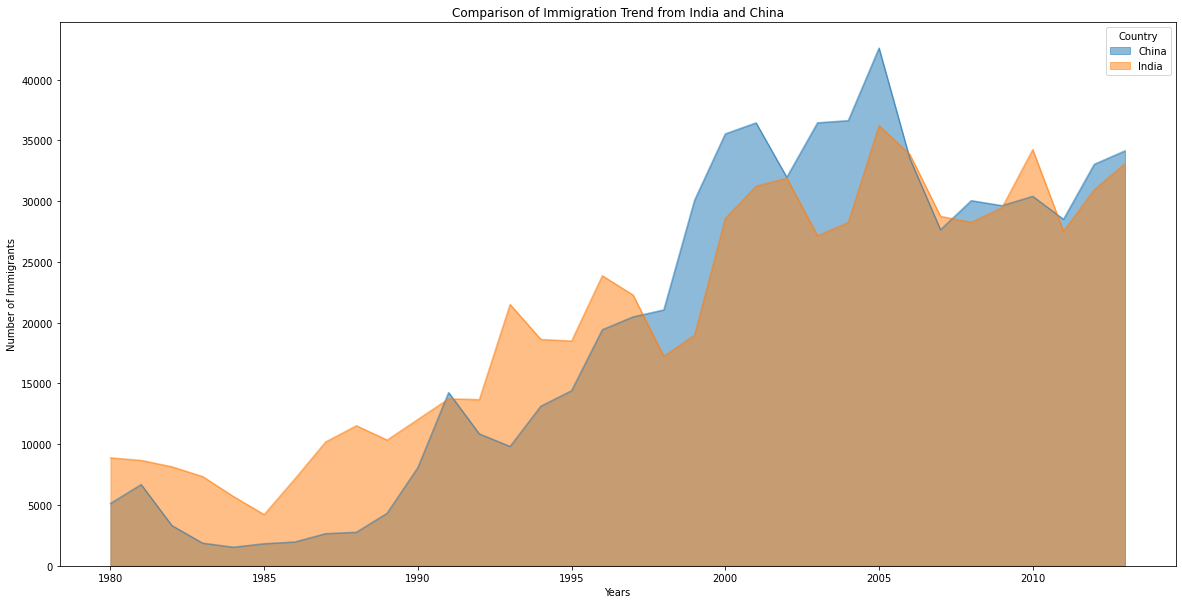

In [ ]:
data.index = data.index.map(int)
data.plot(kind='area', 
          stacked=False,
          figsize=(20, 10), # pass a tuple (x, y) size
          )

plt.title('Comparison of Immigration Trend from India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

dataTop5 = df_can.head()

dataTop5 = dataTop5[years].transpose() 

dataTop5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


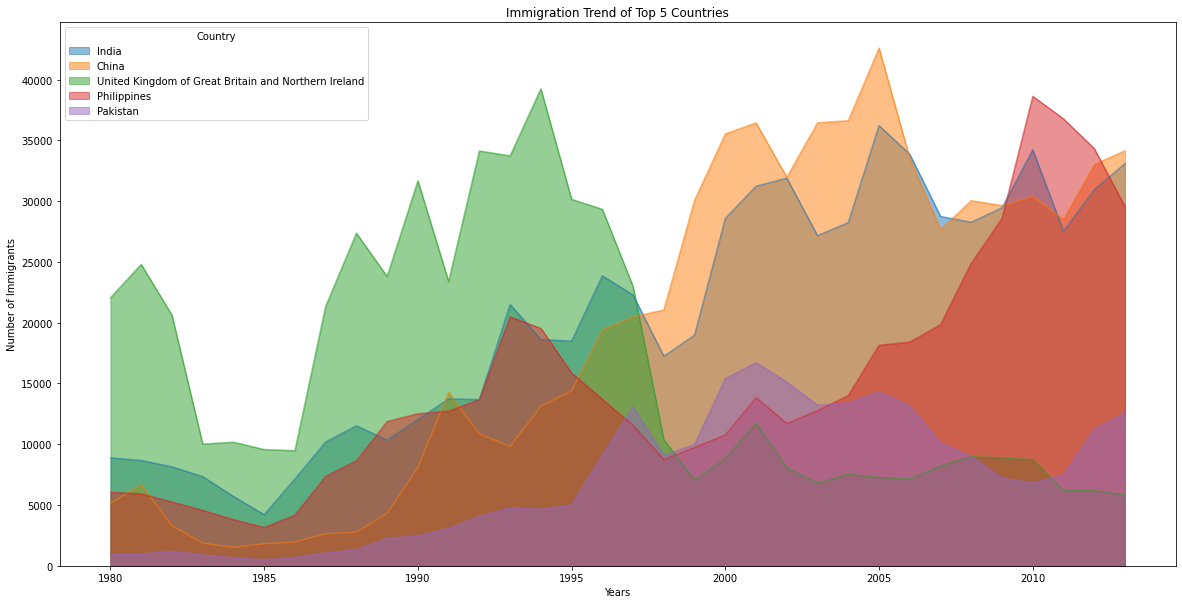

In [ ]:
dataTop5.index = dataTop5.index.map(int)
dataTop5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

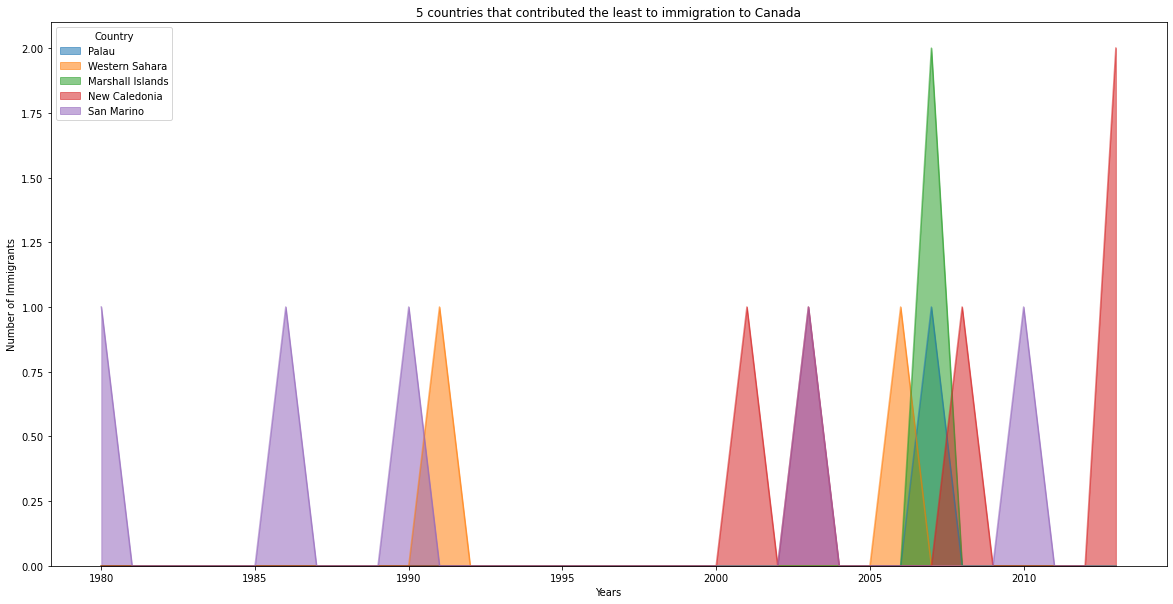

In [ ]:
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

dataTop5 = df_can.head()

dataTop5 = dataTop5[years].transpose() 

dataTop5.index = dataTop5.index.map(int)
dataTop5.plot(kind='area',
             alpha=0.55,
             stacked=False,
             figsize=(20, 10),
             )

plt.title('5 countries that contributed the least to immigration to Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [ ]:
data = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
data.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


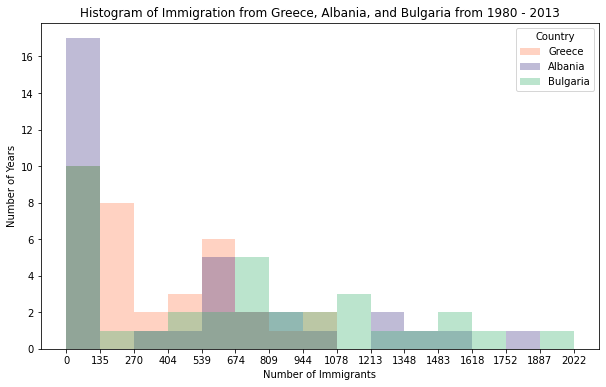

In [ ]:
count, bin_edges = np.histogram(data, 15)

data.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
df_can.sort_values(by = "Total", ascending=True, axis=0, inplace=True)

dataTop_15 = df_can['Total'].tail(15)

dataTop_15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

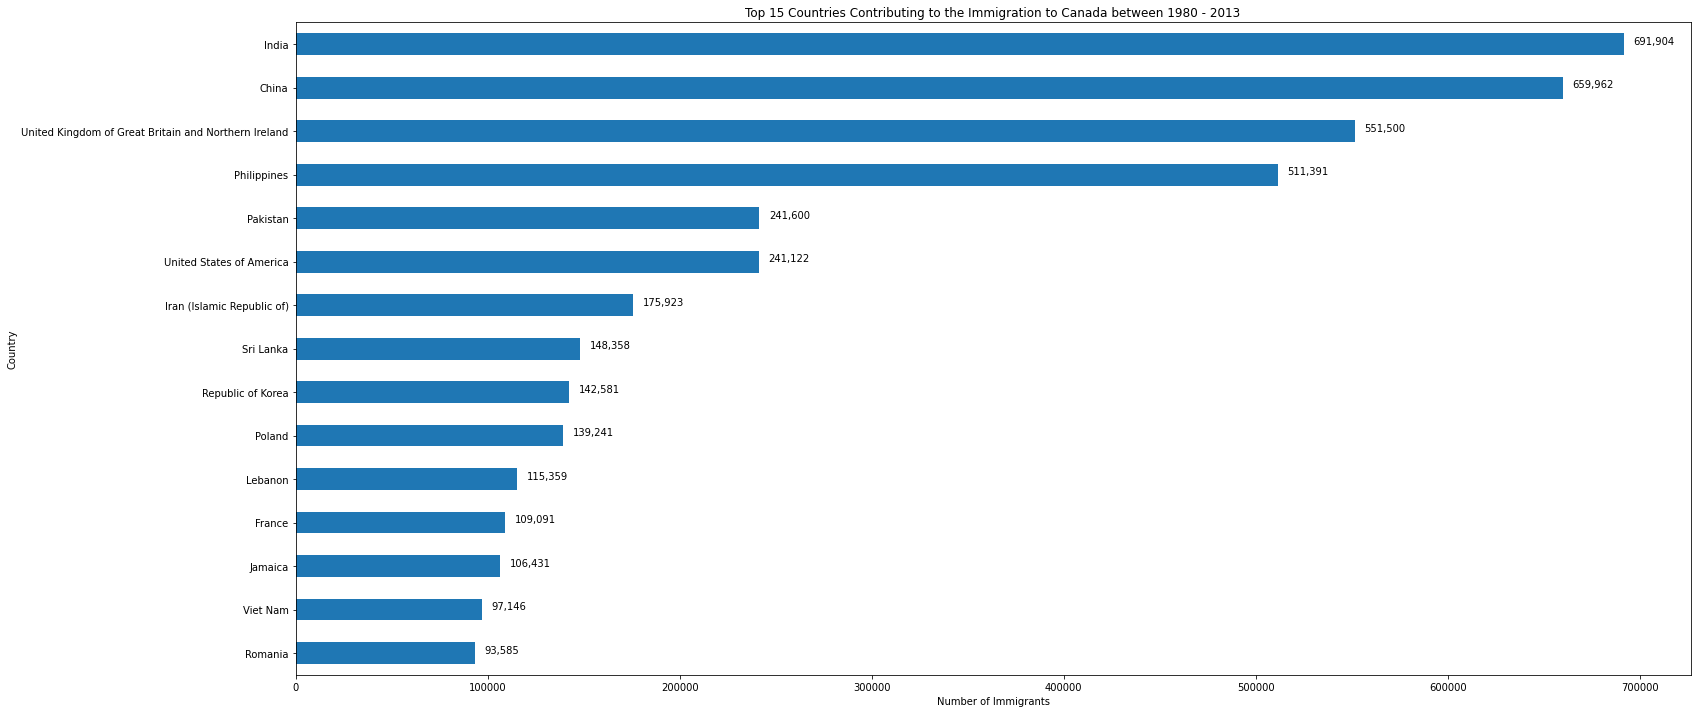

In [ ]:
dataTop_15.plot(kind='barh', 
              figsize=(25, 12))
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(dataTop_15): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value + 5000, index))
plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).